In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files

In [2]:
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [3]:
df = pd.read_csv('breast-cancer.csv')
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_w

In [4]:
# Encode categorical target if needed
if df['diagnosis'].dtype == 'object':
    le = LabelEncoder()
    df['diagnosis'] = le.fit_transform(df['diagnosis'])  # 0 = benign, 1 = malignant

# Select features and target
X = df.iloc[:, 2:4].values   # using 2 features for 2D visualization (can change)
y = df['diagnosis'].values

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

y_pred_linear = svm_linear.predict(X_test_scaled)
print("\n Linear SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))


 Linear SVM Results:
Accuracy: 0.9035087719298246

Confusion Matrix:
 [[67  4]
 [ 7 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        71
           1       0.90      0.84      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [7]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("\n RBF SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))


 RBF SVM Results:
Accuracy: 0.9210526315789473

Confusion Matrix:
 [[67  4]
 [ 5 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        71
           1       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



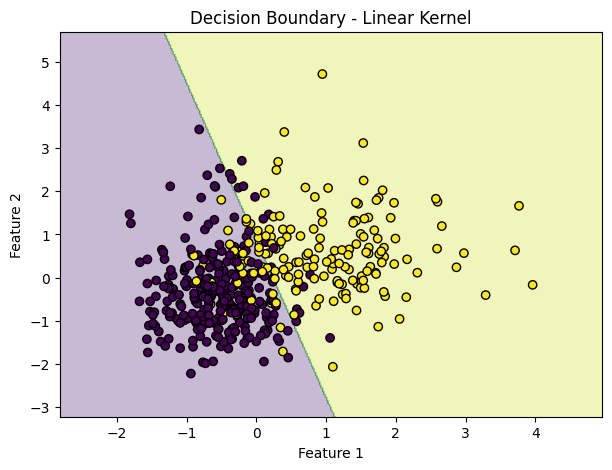

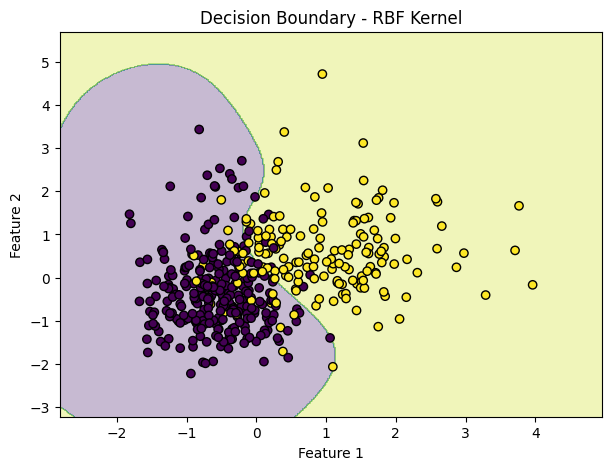

In [8]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(svm_linear, X_train_scaled, y_train, "Decision Boundary - Linear Kernel")
plot_decision_boundary(svm_rbf, X_train_scaled, y_train, "Decision Boundary - RBF Kernel")

In [9]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\n Best Parameters found via Grid Search:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# --- Block 9: Cross-validation ---
cv_scores = cross_val_score(svm_rbf, X_train_scaled, y_train, cv=5)
print("\n Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


 Best Parameters found via Grid Search: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.9010989010989011

 Cross-validation Scores: [0.85714286 0.92307692 0.95604396 0.89010989 0.86813187]
Mean CV Accuracy: 0.8989010989010989
